In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score , GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge , ElasticNet
from sklearn.metrics import r2_score ,accuracy_score,mean_squared_error,make_scorer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.stats import skew

import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(context='notebook',palette='Spectral',style='darkgrid',font_scale=1.5,color_codes=True)

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties like correlation of the dataset.

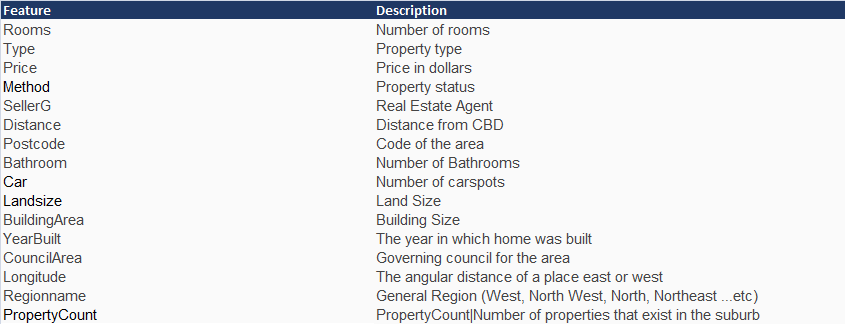

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.sample(n=10)

,Id,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
1923,1456,3,0,1130000,1,155,4.4,3031,1,0,294,140.0,1900,21,144.92920,2,3593
1241,4811,3,1,1011000,1,140,14.2,3149,2,2,297,135.0,2001,20,145.12853,0,13366
2559,2401,3,0,1325000,1,155,2.3,3051,2,1,97,139.0,2011,18,144.94900,2,6821
1828,5675,3,0,520000,3,118,14.7,3030,2,2,312,185.0,2014,30,144.72559,6,15542
3214,2596,3,0,1630000,1,135,3.8,3207,2,2,135,135.0,1997,25,144.93430,5,8648
1547,5362,3,0,1070000,1,20,10.5,3020,2,2,573,198.0,1940,3,144.83713,6,3755
2579,4346,3,0,1400000,1,135,3.8,3207,3,0,92,105.0,1910,25,144.94630,5,8648
1733,5933,5,0,1182000,1,196,16.7,3150,2,3,650,152.0,1975,20,145.17166,0,15321
3766,2719,3,1,714000,1,155,8.8,3072,2,2,185,115.0,2005,6,144.98690,2,14577
1644,4921,3,0,500000,1,196,34.9,3201,2,2,509,125.0,1993,7,145.19084,4,8060


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             4781 non-null   int64  
 1   Rooms          4781 non-null   int64  
 2   Type           4781 non-null   int64  
 3   Price          4781 non-null   int64  
 4   Method         4781 non-null   int64  
 5   SellerG        4781 non-null   int64  
 6   Distance       4781 non-null   float64
 7   Postcode       4781 non-null   int64  
 8   Bathroom       4781 non-null   int64  
 9   Car            4781 non-null   int64  
 10  Landsize       4781 non-null   int64  
 11  BuildingArea   4781 non-null   float64
 12  YearBuilt      4781 non-null   int64  
 13  CouncilArea    4781 non-null   int64  
 14  Longtitude     4781 non-null   float64
 15  Regionname     4781 non-null   int64  
 16  Propertycount  4781 non-null   int64  
dtypes: float64(3), int64(14)
memory usage: 635.1 KB


In [6]:
data.describe()

,Id,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
count,4781.000000,4781.000000,4781.000000,4.781000e+03,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000
mean,3432.481908,2.964861,0.540473,1.080936e+06,1.441330,131.485254,10.045367,3103.308931,1.587952,1.605522,480.500105,143.157231,1964.338423,13.609705,144.991934,3.772223,7477.201213
std,1953.488159,0.957911,0.837337,6.757098e+05,1.141898,77.203630,5.871496,87.538064,0.711276,0.946698,899.489722,91.438501,38.064151,10.389644,0.103051,2.024068,4395.746550
min,0.000000,1.000000,0.000000,1.450000e+05,0.000000,2.000000,0.000000,3000.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-1.000000,144.545320,0.000000,389.000000
25%,1757.000000,2.000000,0.000000,6.300000e+05,1.000000,73.000000,6.100000,3044.000000,1.000000,1.000000,168.000000,94.000000,1940.000000,2.000000,144.927270,2.000000,4380.000000
50%,3434.000000,3.000000,0.000000,9.000000e+05,1.000000,135.000000,9.200000,3083.000000,1.000000,2.000000,411.000000,126.000000,1970.000000,15.000000,144.997500,5.000000,6567.000000
75%,5126.000000,4.000000,1.000000,1.337000e+06,1.000000,194.000000,13.000000,3147.000000,2.000000,2.000000,638.000000,172.000000,2000.000000,23.000000,145.055720,5.000000,10331.000000
max,6829.000000,8.000000,2.000000,9.000000e+06,4.000000,267.000000,47.300000,3977.000000,8.000000,10.000000,37000.000000,3112.000000,2018.000000,32.000000,145.445300,7.000000,21650.000000


In [7]:
data.select_dtypes(include='number')

,Id,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
0,124,3,2,995000,1,135,6.3,3143,2,2,0,100.0,1998,26,145.01600,5,4836
1,5905,2,0,1080000,1,155,2.0,3066,1,0,0,94.0,1890,31,144.98863,2,4553
2,5963,3,0,725000,1,196,17.9,3082,2,2,602,129.0,1980,29,145.06912,2,10529
3,3521,4,0,1330000,1,251,8.0,3016,3,2,217,266.0,2003,10,144.87960,6,6380
4,3738,3,0,620000,1,221,12.4,3060,1,2,604,190.0,1970,23,144.96860,2,5070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4776,335,3,0,2251000,1,135,9.2,3104,1,2,888,137.0,1950,2,145.09490,5,7809
4777,4714,3,2,1275000,1,255,10.1,3163,2,2,750,132.0,1984,8,145.04924,5,7822
4778,2004,5,0,1975000,1,111,5.6,3101,2,1,531,1022.0,1890,2,145.04110,5,10331
4779,227,4,0,1800000,1,106,11.0,3147,2,4,749,206.0,1950,2,145.07700,5,3052


## Analyze Target variable

2.4287910778168236

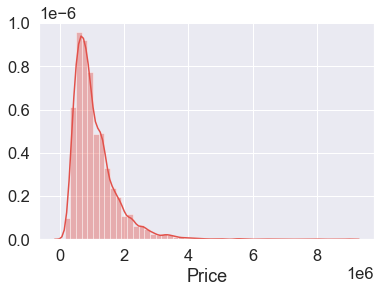

In [8]:
#skewness = 0 : normally distributed.
#skewness > 0 : more weight in the left tail of the distribution.
#skewness < 0 : more weight in the right tail of the distribution. 

sns.distplot(data['Price'])
skew(data['Price'])

0.22372145276736385

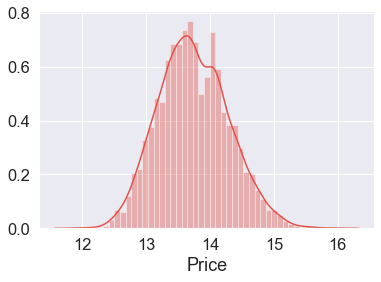

In [9]:
sns.distplot(np.log(data['Price']))
skew(np.log(data['Price']))

#### Observation ####
###### Target variable price is positively skewed .  Taking log of "Price" reduces skewness of the data.

## Analyze Predictor variables

In [10]:
## Feature and encoding column list

feature_list = []
encoding_list = []

-0.09621714423807076

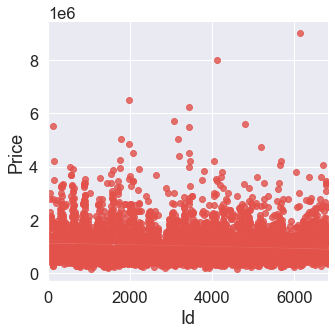

In [11]:
## Price Vs Id
sns.lmplot(x="Id", y="Price", data=data)
data['Price'].corr(data['Id'])

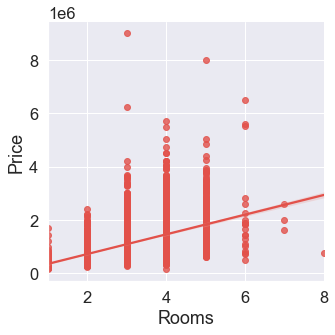

In [12]:
## Price Vs Rooms
sns.lmplot(x="Rooms", y="Price", data=data)
data['Price'].corr(data['Rooms'])

## Seems correlation . # of rooms is cardinal as rooms increasing price is increasing. One outlier

feature_list.append('Rooms')

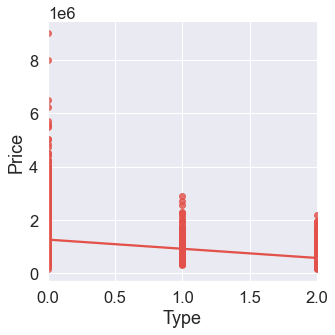

In [13]:
## Price Vs Type
sns.lmplot(x="Type", y="Price", data=data)
data['Price'].corr(data['Type'])

## seems linearity . categorical (nominal) data.. Candidate for one hot encoding
encoding_list.append('Type')

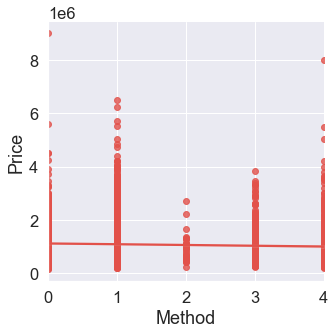

In [14]:
## Price Vs Method
sns.lmplot(x="Method", y="Price", data=data)
data['Method'].corr(data['Price'])

## categorical nominal data .. one hot encoding 
encoding_list.append('Method')

-0.06539312741073673

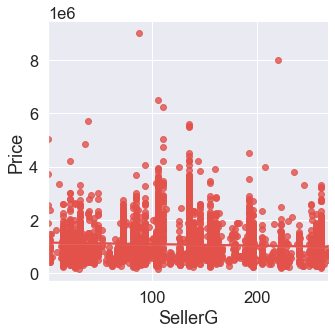

In [15]:
## Price Vs SellerG
sns.lmplot(x="SellerG", y="Price", data=data)
data['SellerG'].corr(data['Price'])

## categorical ordinal data .. nominal ,, one hot encoding

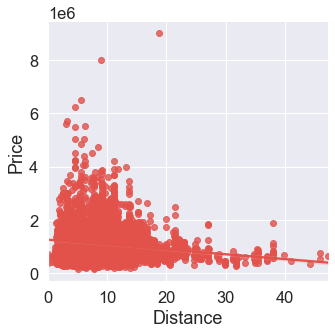

In [16]:
## Price Vs Distance
sns.lmplot(x="Distance", y="Price", data=data)
data['Distance'].corr(data['Price'])

#has correlation
feature_list.append('Distance')

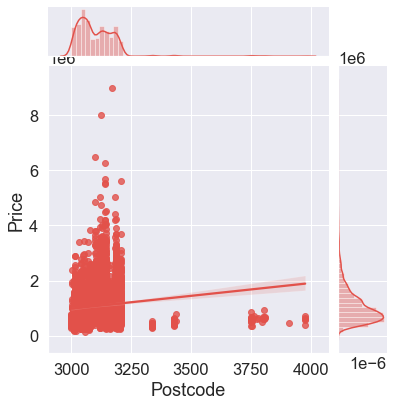

In [17]:
## Price Vs Postcode

#sns.lmplot(x="Postcode", y="Price", data=data)

data['Postcode'].corr(data['Price'])

g = sns.JointGrid(x="Postcode", y="Price", data=data)
g.plot(sns.regplot, sns.distplot)
## has corelation .. nominal one hot encoding
encoding_list.append('Postcode')

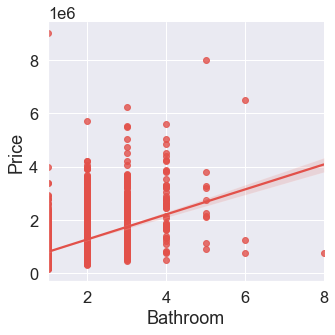

In [18]:
## Price Vs Bathroom
sns.lmplot(x="Bathroom", y="Price", data=data)
data['Bathroom'].corr(data['Price'])

## has corelation and cardinal
feature_list.append('Bathroom')

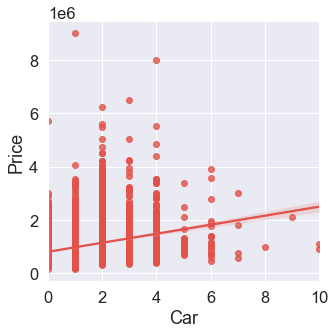

In [19]:
## Price Vs Car
sns.lmplot(x="Car", y="Price", data=data)
data['Car'].corr(data['Price'])

## categorical - ordinal.. Polynomial ??

feature_list.append('Car')

0.07275306511214027

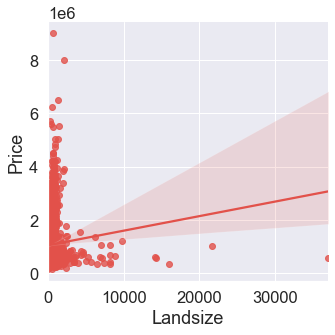

In [20]:
## Price Vs Landsize
sns.lmplot(x="Landsize", y="Price", data=data)
data['Landsize'].corr(data['Price'])

## no correlation

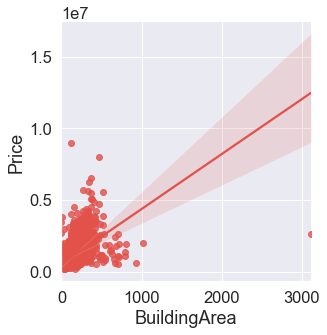

In [21]:
## Price Vs BuildingArea
sns.lmplot(x="BuildingArea", y="Price", data=data)
data['BuildingArea'].corr(data['Price'])

## corelation
feature_list.append('BuildingArea')

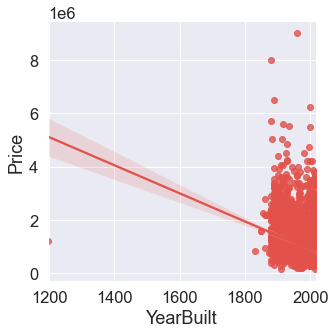

In [22]:
## Price Vs YearBuilt
sns.lmplot(x="YearBuilt", y="Price", data=data)
data['YearBuilt'].corr(data['Price'])

#d = data[data['YearBuilt']>1800]
#sns.lmplot(x="YearBuilt", y="Price", data=d)
#d['YearBuilt'].corr(d['Price'])

#print(data.shape)
#print(d.shape)
#dataset_train.loc[(dataset_train["Family"]<=4) 

feature_list.append('YearBuilt')

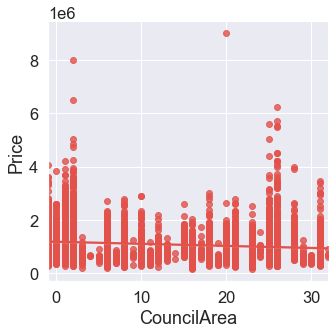

In [23]:
## Price Vs CouncilArea
sns.lmplot(x="CouncilArea", y="Price", data=data)
data['CouncilArea'].corr(data['Price'])

## categorical .. nominal
encoding_list.append('CouncilArea')

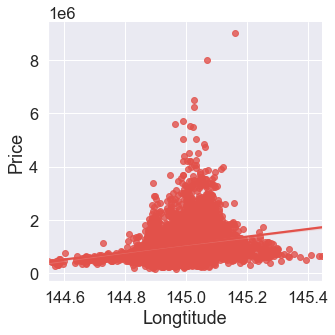

In [24]:
## Price Vs Longtitude
sns.lmplot(x="Longtitude", y="Price", data=data)
#sns.regplot(x="Longtitude", y="Price", data=data, order=4)
data['Longtitude'].corr(data['Price'])

# correlation
feature_list.append('Longtitude')

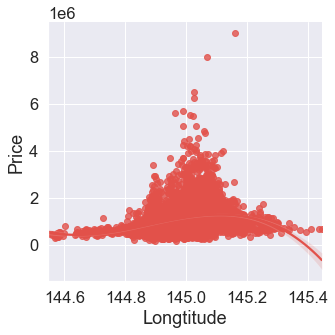

In [25]:
sns.lmplot(x = "Longtitude", y = "Price", data = data,order = 3)

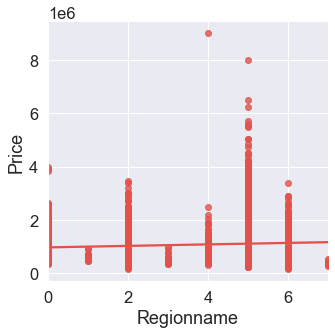

In [26]:
## Price Vs Regionname
sns.lmplot(x="Regionname", y="Price", data=data)
data['Regionname'].corr(data['Price'])

## categorical .. nominal
encoding_list.append('Regionname')

-0.05239923393052036

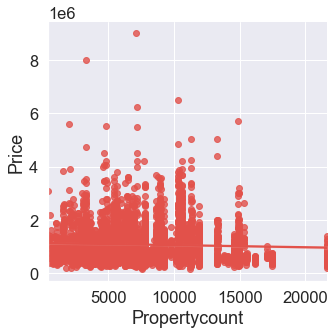

In [27]:
## Price Vs Propertycount
sns.lmplot(x="Propertycount", y="Price", data=data)
data['Propertycount'].corr(data['Price'])

# no corelation

In [28]:
feature_list = list(set(feature_list))
feature_list

['Distance',
 'Longtitude',
 'Rooms',
 'BuildingArea',
 'YearBuilt',
 'Bathroom',
 'Car']

In [29]:
encoding_list = list(set(encoding_list))
encoding_list

['Regionname', 'CouncilArea', 'Type', 'Method', 'Postcode']

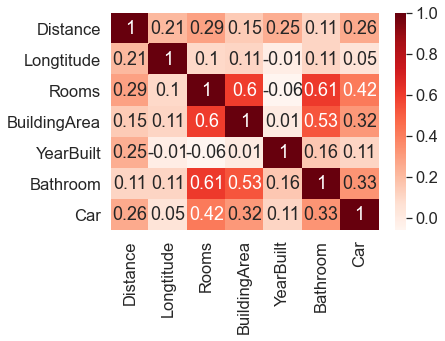

In [30]:
# Code starts here

# Feature relation
#plt.figure(figsize=(15,15))
feature_corr = np.around(data[feature_list].corr(),2)
sns.heatmap(feature_corr,annot=True,cmap=plt.cm.Reds)

# Code ends here.

## Model building

- Separate the features and target and then split the train data into train and validation set.
- Apply different models of your choice and  then predict on the validation data and find the `accuracy_score` for this prediction.
- Try improving upon the `accuracy_score` using different regularization techniques.

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [31]:
data.shape

(4781, 17)

In [32]:
#Indepenent varibles
X = data.drop('Price',axis=1)

# store dependent variable
y = data['Price']

In [33]:
# Split data into train and test
X_train,X_val,y_train,y_val=train_test_split(X,y ,test_size=0.3,random_state=8)

In [34]:
# Linear Model

# Fit the train data
base_model = LinearRegression()

#print(base_model)
base_model.fit(X_train,y_train)

# Predict
y_pred = base_model.predict(X_val)

# Score
r2=r2_score(y_val, y_pred)
print('Base Model :: r2: ', r2)


Base Model :: r2:  0.6703216041507574


## Regularization

In [35]:
# Predict the price of the house using a lasso regressor. Check if there is any improvement in the prediction.

# instantiate lasso model
lasso = Lasso()

# fit and predict
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_val)

# calculate RMSE
r2_lasso = r2_score(y_val, lasso_pred)
print (r2_lasso)

0.67032143092122


In [36]:
# Let's check the house price prediction using a ridge regressor.

# instantiate lasso model
ridge = Ridge()

# fit and predict
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_val)

# calculate RMSE)
r2_ridge = r2_score(y_val, ridge_pred)
print (r2_ridge)

0.6701703431605903


## Cross Validation

In [37]:
# Next predict the house price using cross-validated estimators which are the part of the Model selection: 
# choosing estimators and their parameters.

# Initiate Linear Regression Model
regressor=LinearRegression()

# Initiate cross validation score
score= cross_val_score(regressor,X_train,y_train ,scoring= 'r2' ,cv=10)
print(score)
#calculate mean of the score
mean_score = np.mean(score)

# print mean score
print(mean_score)

[0.57747803 0.69688995 0.6883945  0.21032278 0.54800993 0.63579409
 0.45914909 0.65362214 0.61336075 0.58564788]
0.5668669157096439


#### As you can see that there is very less improvement(~1%), even after applying the regularization and cross-validation score, perform the prediction using a polynomial regressor to generate second-degree polynomial features. 

In [38]:
# make pipeline for second degree polynomialfeatures
model = make_pipeline(PolynomialFeatures(2), LinearRegression())

# Fit the model on training set
model.fit(X_train, y_train)

# predict the model performance
y_pred = model.predict(X_val)

# calculate r2 score
r2_poly= r2_score(y_val,y_pred)

# print r2 score
print(r2)

0.6703216041507574


In [39]:
best_model = model

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [40]:
#Load test data
test_data = pd.read_csv('test.csv')

# Store Id
results = pd.DataFrame(test_data['Id'])

# Separate features and target
test_data_features = test_data

# Predict
test_data_pred = best_model.predict(test_data_features)

# Add to results
results['Price'] = test_data_pred.tolist()

# Write to CSV
results.to_csv('results.csv',index=False)

# Code ends here.

## END